In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
import sklearn

# **ب)**

In [ ]:
dataset = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(train_X, train_y), (test_X, test_y) = dataset

The image label of index 5 is  2


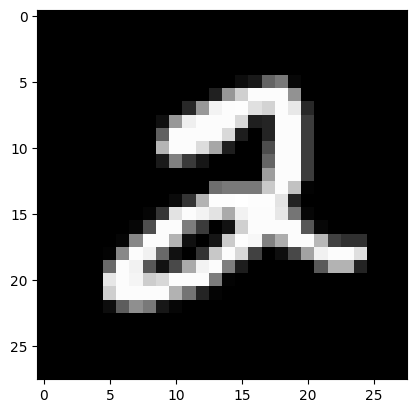

In [ ]:
i=5
pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
print('The image label of index',  5, 'is ', train_y[i])
pyplot.show()

# **پ)**

In [ ]:
train_X = train_X.reshape((len(train_X), 28 * 28))
test_X = test_X.reshape((len(test_X), 28 * 28))
print('train shape: ', train_X.shape)
print('test shape: ', test_X.shape)

train shape:  (54000, 784)
test shape:  (10000, 784)


# **ت)**

In [ ]:
from sklearn.model_selection import train_test_split

train_X, validation_X, train_y, validation_y = train_test_split(train_X, train_y, test_size=0.1, random_state=42)
print('train shape: ', train_X.shape)
print('validation shape: ', validation_X.shape)


train shape:  (48600, 784)
validation shape:  (5400, 784)


# **ث)**

In [ ]:
def manhattan1(x,y):
    return np.sum(x-y)

def euclidean1(x,y):
    return np.sqrt(np.sum(np.square(x-y)))

def kNN1(x, k, data, label, distance):
    distances =[distance(x,data[i]) for i in range(len(data))]
    idx = np.argpartition(distances, k)
    clas, freq = np.unique(label[idx[:k]], return_counts=True)
    return clas[np.argmax(freq)]

In [ ]:
# Generated by ChatGPT
def manhattan(x, y):
    return np.sum(np.abs(x - y))

def euclidean(x, y):
    return np.linalg.norm(x - y)

def kNN(x, k, data, label, distance):
    distances = np.apply_along_axis(distance, 1, data, x)
    idx = np.argpartition(distances, k)[:k]
    clas, freq = np.unique(label[idx], return_counts=True)
    return clas[np.argmax(freq)]

In [ ]:
i=525
print('The predicted value is ',
      kNN(test_X[i], 5, train_X, train_y, euclidean),
      ' and the true value is ',
      test_y[i])

The predicted value is  0  and the true value is  0


# **ج)**

In [ ]:
def accuracy(test_data, test_label, train_data, train_label, k, distance):
    correct_predictions = 0

    for x, lab in zip(test_data, test_label):
        predicted_label = kNN(x, k, train_data, train_label, distance)
        if predicted_label == lab:
            correct_predictions += 1

    return correct_predictions / len(test_label)

In [ ]:
acc = []
for k in range(1, 10, 2):
    acc = accuracy(validation_X, validation_y, train_X, train_y, k, euclidean)
    print(f'Accuracy for k={k}: {acc}')

best_k = np.argmax(acc) * 2 + 1

# **چ)**

In [ ]:
train2_X = np.concatenate((validation_X , train_X), axis=0)
train2_y = np.concatenate((validation_y , train_y), axis=0)

In [ ]:
# Test by Euclidean
accuracy(test_X , test_y , train2_X, train2_y, best_k, euclidean)

In [ ]:
# Test by Manhattan
accuracy(test_X , test_y , train2_X, train2_y, best_k, manhattan)

# **ح)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train2_X, train2_y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score

pred_y = neigh.predict(test_X)
accuracy_score(test_y, pred_y)

0.9704